In [13]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/thk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/thk/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Load the CSV file into a pandas DataFrame
file_path = './data/kakao_data_1121.csv'
df = pd.read_csv(file_path)

In [16]:
# Extract the conversation data from the third column
conversation_data = df['Message'].astype(str)

In [17]:
conversation_data

0      협업이 힘들어?
1            놉놉
2      개발이 어려워요
3       무능해서 ㅜㅜ
4            흑흑
         ...   
843           오
844      신발 사야지
845    무슨신발 사시게
846    이미 질렀습네다
847          껄껄
Name: Message, Length: 848, dtype: object

In [19]:
# Tokenize the text
tokenized_conversations = [word_tokenize(message) for message in conversation_data]

In [20]:
# Remove stopwords
stop_words = set(stopwords.words('english'))  # You may need to adjust the language
filtered_conversations = [
    [word.lower() for word in message if word.isalnum() and word.lower() not in stop_words]
    for message in tokenized_conversations
]

In [21]:
# Apply stemming
stemmer = PorterStemmer()
stemmed_conversations = [
    [stemmer.stem(word) for word in message]
    for message in filtered_conversations
]

In [22]:
# Assuming filtered_conversations is the final preprocessed data
df['Processed_Message'] = [' '.join(message) for message in filtered_conversations]
df.to_csv('./result/kakao_preprocessed_data.csv', index=False)

In [23]:
import matplotlib.pyplot as plt

# Assuming filtered_conversations is the final preprocessed data
message_lengths = [len(message) for message in filtered_conversations]

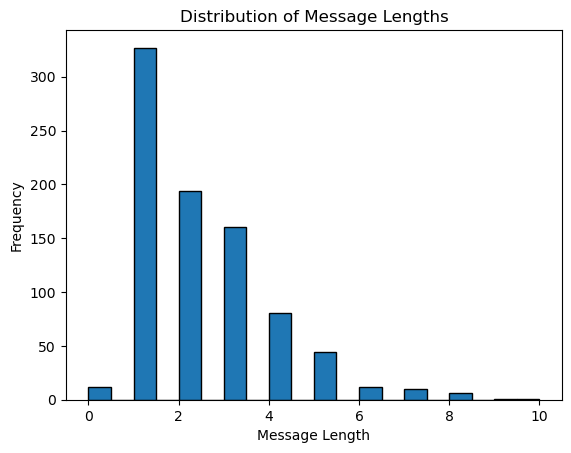

In [24]:
plt.hist(message_lengths, bins=20, edgecolor='black')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')
plt.show()

In [25]:
from wordcloud import WordCloud

In [47]:
import matplotlib

In [48]:
# Combine all tokenized messages into a single list of words
all_words = [word for message in tokenized_conversations for word in message]

In [49]:
# Create a string from the list of words
text = ' '.join(all_words)

In [50]:
# Generate a word cloud
wordcloud = WordCloud(
  font_path='/Library/Fonts/Arial Unicode.ttf',
  width=800, height=400, background_color='white').generate(text)

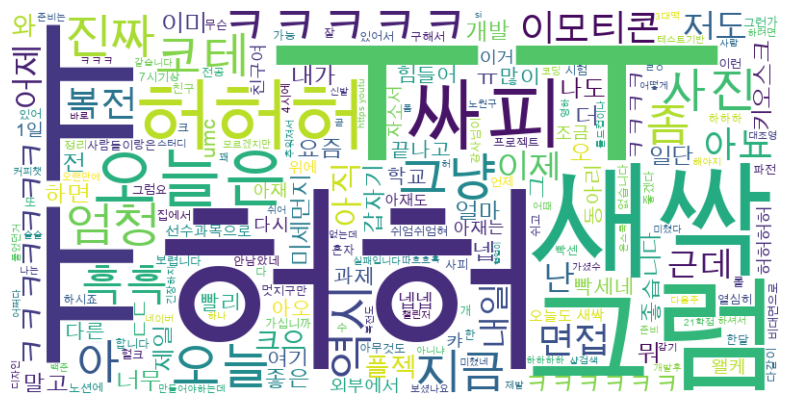

In [51]:
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
plt.savefig('./result/kakao_wordcloud_1121.png')

<Figure size 640x480 with 0 Axes>